In [152]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

df_clients = pd.read_csv("data/clients.csv")
df_produits = pd.read_csv("data/produits.csv")
df_ventes = pd.read_csv("data/ventes.csv")

df_main = df_ventes.merge(df_clients, how='inner', on='client_id')
df_main = df_main.merge(df_produits, how='inner', on='id_prod')
df_main = df_main[df_main['price'] >= 0]
df_main.drop(df_main[df_main.birth == 'test'].index, inplace=True)
df_main.drop_duplicates()
df_main = df_main[df_main['price'].notna()].reset_index()

df_clients.sort_values(by=['client_id'], inplace=True)
df_produits = df_produits[df_produits['price'] > 0]
df_info = df_produits.describe()
print(df_main.info())
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336713 entries, 0 to 336712
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       336713 non-null  int64  
 1   id_prod     336713 non-null  object 
 2   date        336713 non-null  object 
 3   session_id  336713 non-null  object 
 4   client_id   336713 non-null  object 
 5   sex         336713 non-null  object 
 6   birth       336713 non-null  int64  
 7   price       336713 non-null  float64
 8   categ       336713 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 23.1+ MB
None
             price        categ
count  3286.000000  3286.000000
mean     21.863597     0.370359
std      29.849786     0.615446
min       0.620000     0.000000
25%       6.990000     0.000000
50%      13.075000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

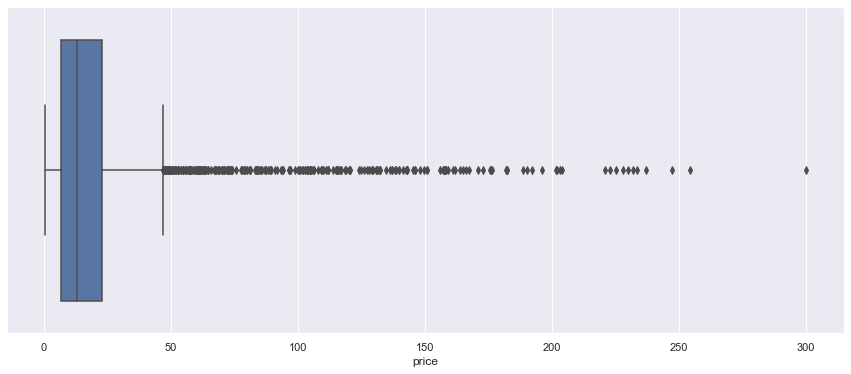

In [153]:
sbn.set(rc = {'figure.figsize':(15,6)})
sbn.boxplot(df_produits.price)

             price        categ
count  3286.000000  3286.000000
mean     21.863597     0.370359
std      29.849786     0.615446
min       0.620000     0.000000
25%       6.990000     0.000000
50%      13.075000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000
     id_prod   price  categ    ct
2272   0_528    0.62      0     1
2355   0_202    0.62      0     2
370    0_120    0.66      0     3
1211  0_1844    0.77      0     4
1530  0_1620    0.80      0     5
...      ...     ...    ...   ...
2779    2_30  233.54      2  3282
1436   2_167  236.99      2  3283
394    2_158  247.22      2  3284
724     2_76  254.44      2  3285
947      2_2  300.00      2  3286

[3286 rows x 4 columns]


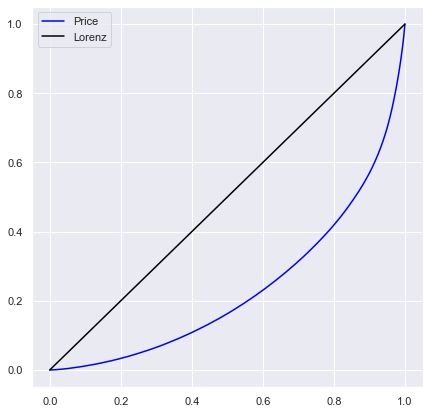

Le coefficient de Gini est de 0.5317286330993778


In [165]:
# ensure your arr is sorted from lowest to highest values first!
arr = df_produits[df_produits['price'] > 0].sort_values(by='price')
print(arr.describe())
arr['ct'] = np.arange(1, len(arr)+1)
print(arr)
x = arr['ct']
y = arr['price'].cumsum()

sbn.set(rc = {'figure.figsize':(7,7)})
plt.plot(x/max(x), y/max(y), 'blue', label="Price")
plt.plot(x/max(x), x/max(x), 'black', label="Lorenz")
plt.legend()
plt.show()

def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

print('Le coefficient de Gini est de ' + str(gini(arr['price'])))

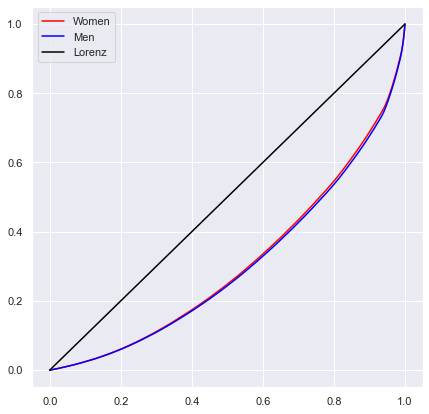

In [155]:
women = df_main[df_main['sex'] == 'f'].sort_values(by='price')
men = df_main[df_main['sex'] == 'm'].sort_values(by='price')

women_arrange = np.arange(1, len(women)+1)
men_arrange = np.arange(1, len(men)+1)

x = women_arrange
x2 = men_arrange
y = women['price'].cumsum()
y2 = men['price'].cumsum()

plt.plot(x/max(x), y/max(y), 'red', label="Women")
plt.plot(x2/max(x2), y2/max(y2), 'blue', label="Men")
plt.plot(x/max(x), x/max(x), 'black', label="Lorenz")
plt.legend()
plt.show()


In [156]:
df_sex_cat_women = df_main[df_main['sex'] == 'f']
df_sex_cat_women = df_sex_cat_women.groupby(['categ'])['id_prod'].count().reset_index()
df_sex_cat_men = df_main[df_main['sex'] == 'm']
df_sex_cat_men = df_sex_cat_men.groupby(['categ'])['id_prod'].count().reset_index()

Corrélation entre le sexe des clients et les catégories de produits achetés


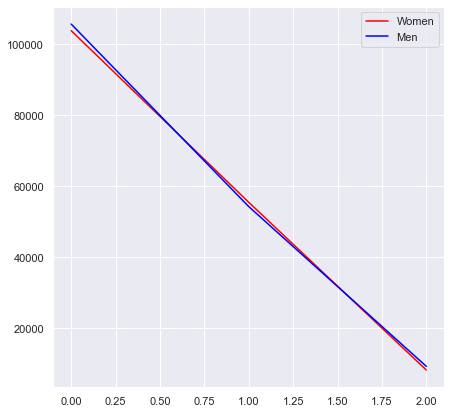

In [157]:
print('Corrélation entre le sexe des clients et les catégories de produits achetés')
plt.plot(df_sex_cat_women['categ'], df_sex_cat_women['id_prod'], 'red', label="Women")
plt.plot(df_sex_cat_men['categ'], df_sex_cat_men['id_prod'], 'blue', label="Men")
plt.legend()
plt.show()

In [158]:
df_panier = df_main.groupby(['session_id']).agg({'price':'sum', 'birth': 'mean'})
df_panier["age"] =  2022 - df_panier['birth']
df_panier.sort_values(by='age')
df_panier_mean = df_panier.groupby(['age'])['price'].mean().reset_index()
df_panier_sum = df_panier.groupby(['age'])['price'].sum().reset_index()

Moyenne des achats par panier et par âge


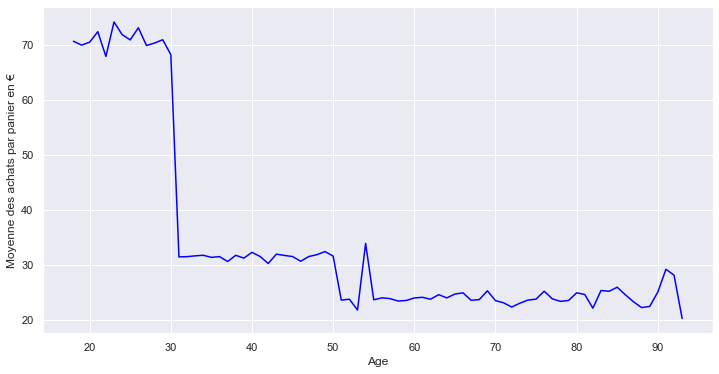

In [159]:
print('Moyenne des achats par panier et par âge')
fig = plt.figure(1, figsize=(12, 6))
plt.plot(df_panier_mean['age'], df_panier_mean['price'], 'blue')
plt.xlabel("Age")
plt.ylabel("Moyenne des achats par panier en €")
plt.show()

Total des achats par âge


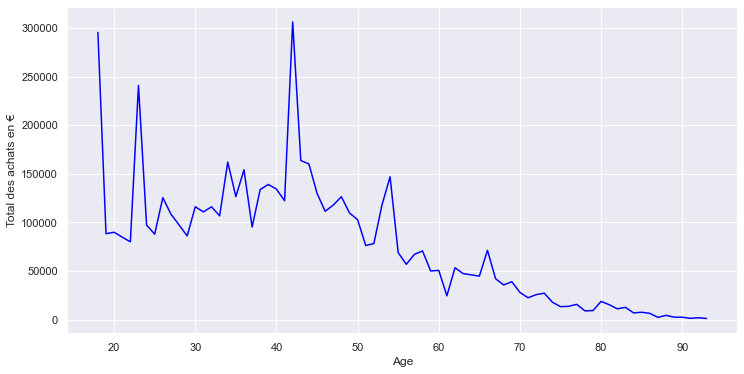

In [167]:
print('Total des achats par âge')
fig = plt.figure(1, figsize=(12, 6))
plt.plot(df_panier_sum['age'], df_panier_sum['price'], 'blue')
plt.xlabel("Age")
plt.ylabel("Total des achats en €")
plt.show()

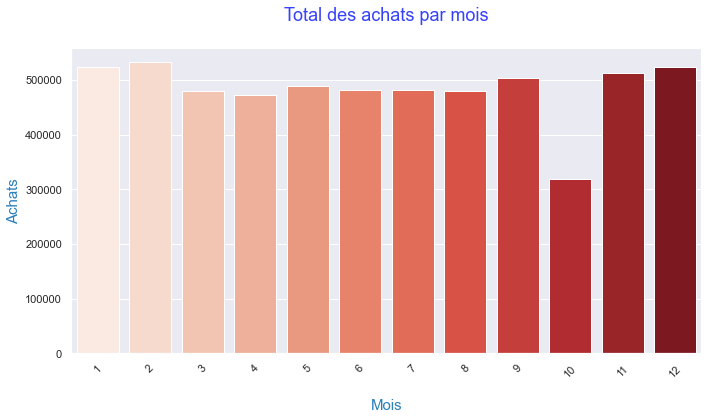

In [161]:
df_main['year'] = pd.to_datetime(df_main['date'], format='%Y-%m-%d %H:%M:%S.%f').dt.year
df_main['month'] = pd.to_datetime(df_main['date'], format='%Y-%m-%d %H:%M:%S.%f').dt.month
df_main['age'] = 2022 - df_main['birth']
df_main_v2 = df_main
df_main_v2 = df_main_v2.groupby(['month'])['price'].sum().reset_index()

plt.figure(figsize=(10,6))
sbn.barplot(x=df_main_v2['month'], y=df_main_v2['price'], palette="Reds")
plt.xlabel('\nMois', fontsize=15, color='#2980b9')
plt.ylabel('Achats', fontsize=15, color='#2980b9')
plt.title("Total des achats par mois\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

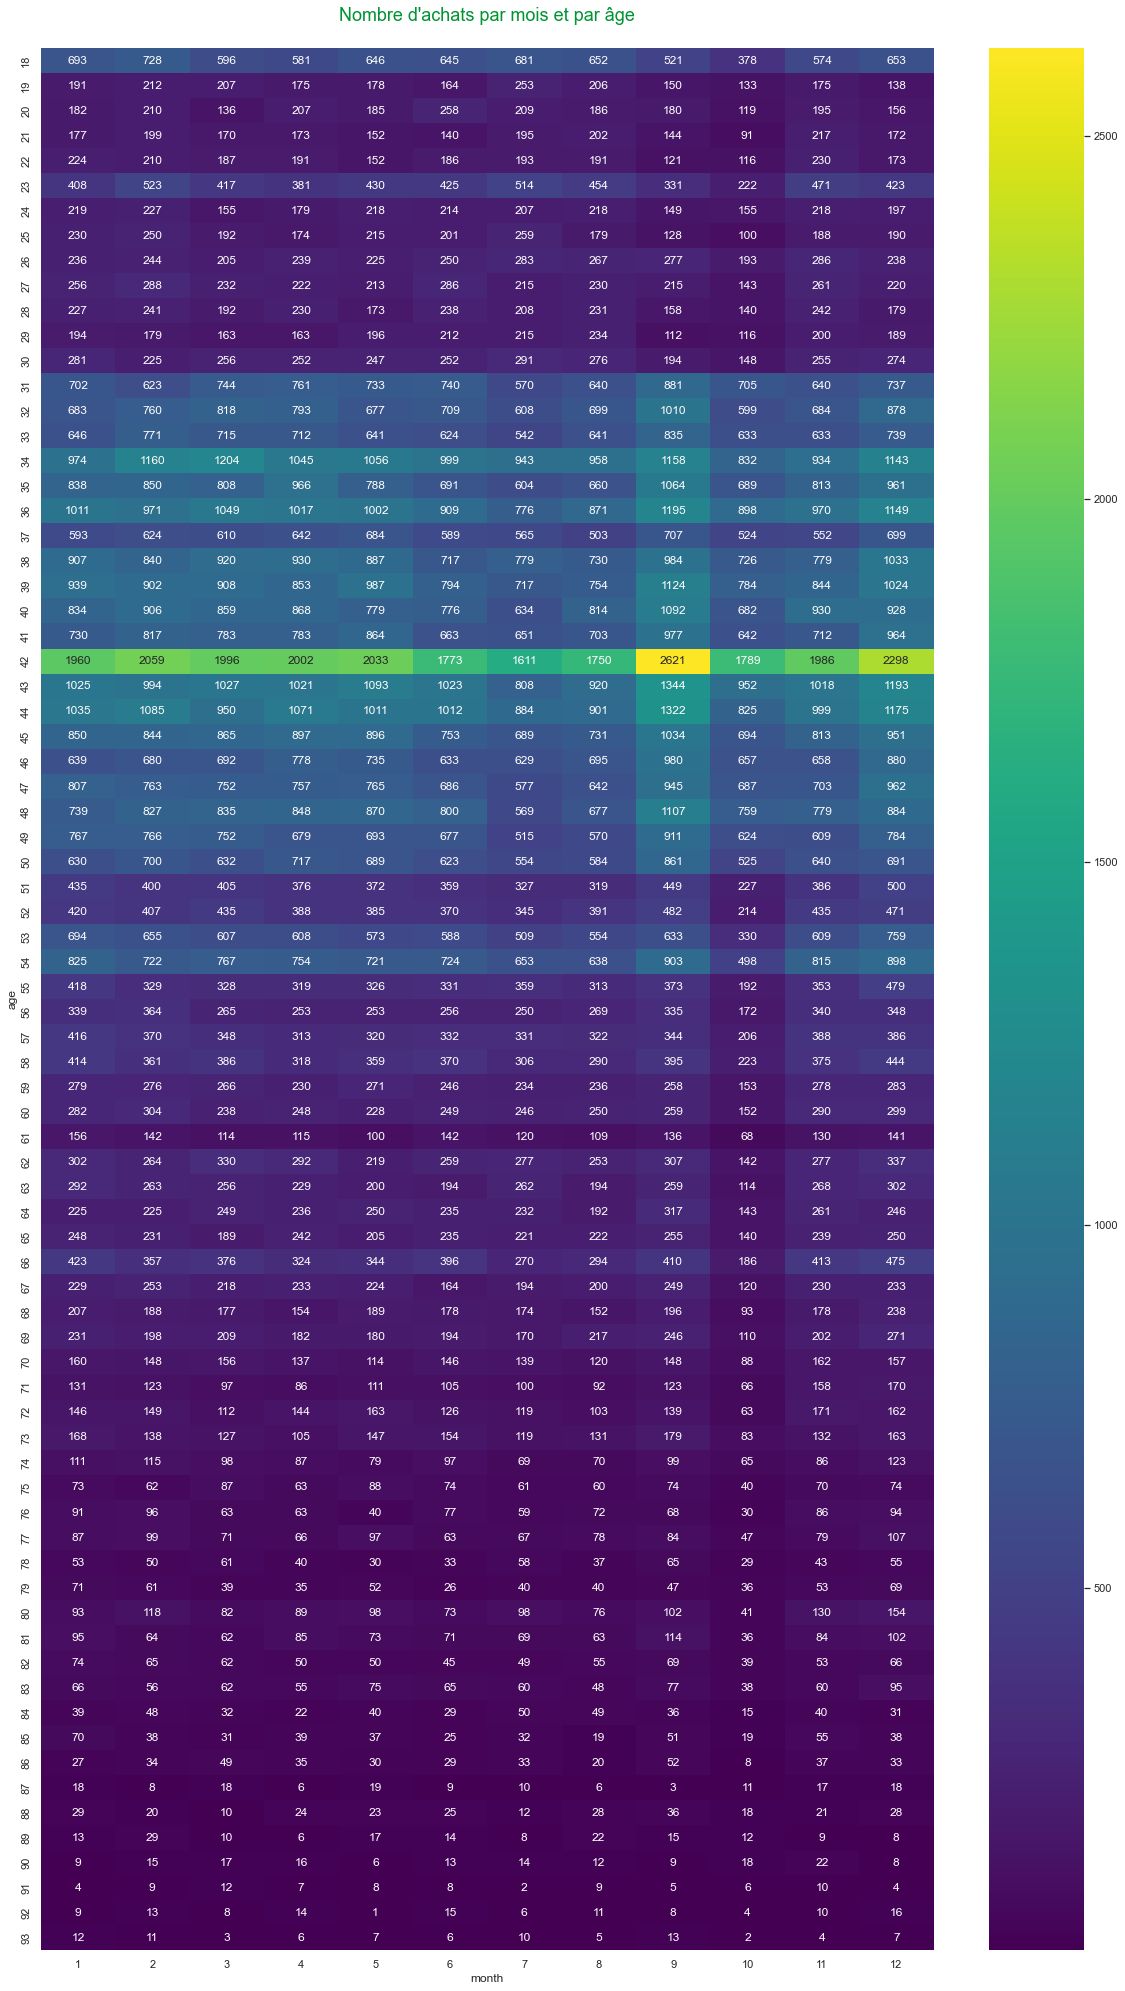

,month,age,id_prod
0,1,18,693
1,1,19,191
2,1,20,182
3,1,21,177
4,1,22,224
...,...,...,...
907,12,89,8
908,12,90,8
909,12,91,4
910,12,92,16


In [162]:
df_frequence = df_main
df_frequence = df_frequence.groupby(['month', 'age'])['id_prod'].count().reset_index()

result = df_frequence.pivot(index='age', columns='month', values='id_prod')
sbn.set(rc = {'figure.figsize':(20,35)})
sbn.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title("Nombre d'achats par mois et par âge\n", fontsize=18, color='#009432')
plt.show()

df_frequence

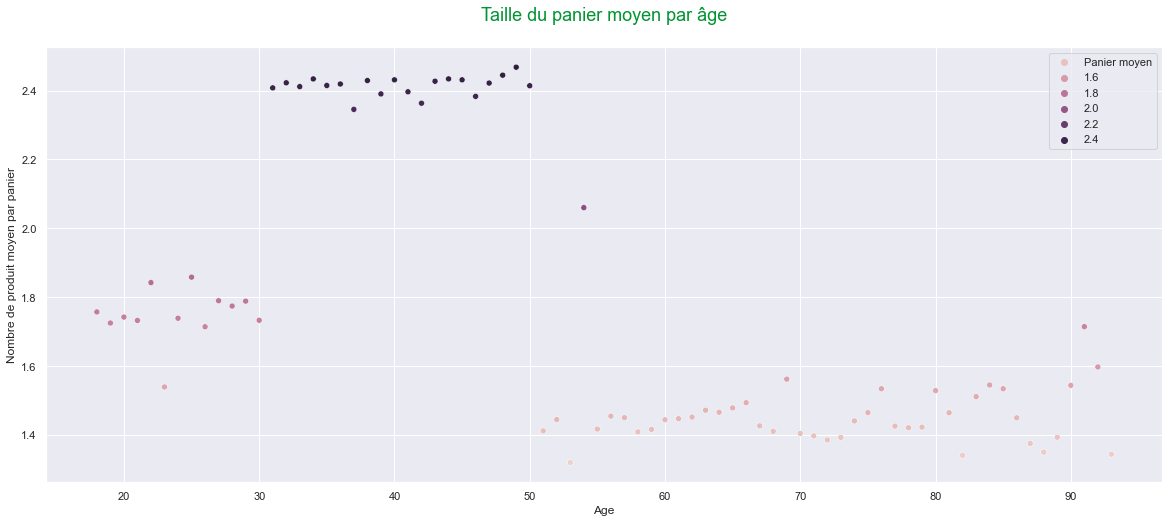

In [163]:
df_panier_moyen = df_main
df_panier_moyen = df_panier_moyen.groupby(['session_id', 'age'])['id_prod'].count().reset_index()
df_panier_moyen = df_panier_moyen.groupby(['age'])['id_prod'].mean().reset_index()

sbn.set(rc = {'figure.figsize':(20,8)})
sbn.scatterplot(data = df_panier_moyen, x = "age", y = "id_prod", hue="id_prod")
plt.title("Taille du panier moyen par âge\n", fontsize=18, color='#009432')
plt.xlabel("Age")
plt.ylabel("Nombre de produit moyen par panier")
plt.legend().get_texts()[0].set_text('Panier moyen')
plt.show()

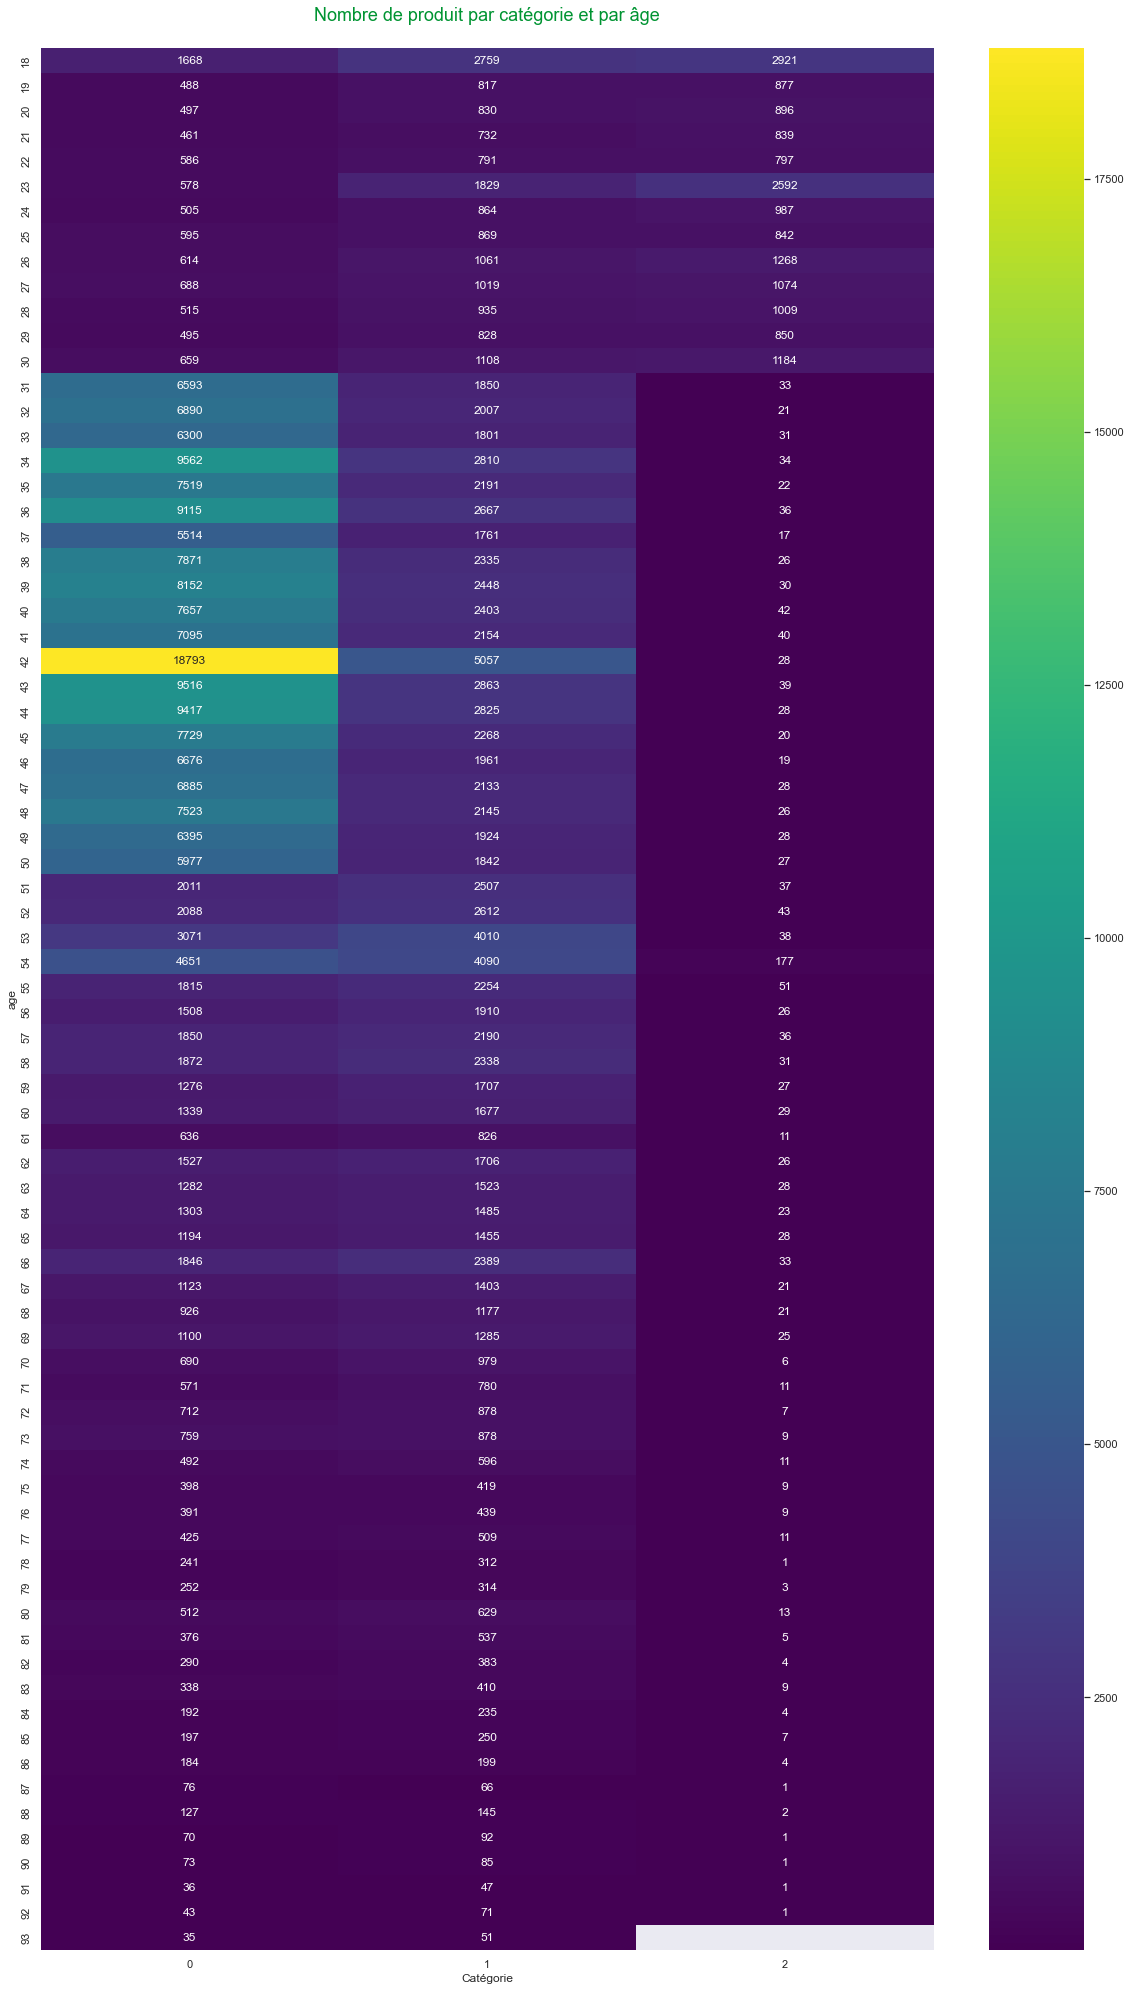

,categ,age,id_prod
0,0,18,1668
1,0,19,488
2,0,20,497
3,0,21,461
4,0,22,586
...,...,...,...
222,2,88,2
223,2,89,1
224,2,90,1
225,2,91,1


In [164]:
df_cat = df_main
df_cat = df_cat.groupby(['categ', 'age', ])['id_prod'].count().reset_index()

result = df_cat.pivot(index='age', columns='categ', values='id_prod')
sbn.set(rc = {'figure.figsize':(20,35)})
sbn.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.xlabel("Catégorie")
plt.title("Nombre de produit par catégorie et par âge\n", fontsize=18, color='#009432')
plt.show()
df_cat